# Math 404 - Analyzing Nonlinear Systems
$\mathbb{E}\text{van}~\mathbb{C}\text{arpenter}$ 

TODO
1. Can it be that it finds all fixed points?
2. Normalize eigenvectors
3. Find actual solution? 
4. maybe with nullclines

In [1]:
import sympy
import scipy.optimize as sp
import numpy as np
import matplotlib.pyplot as plt
sympy.init_printing(use_latex="mathjax")
x_s, y_s = sympy.symbols(" x y ")
mu, r, a, b  = sympy.symbols(" \mu r a b ")

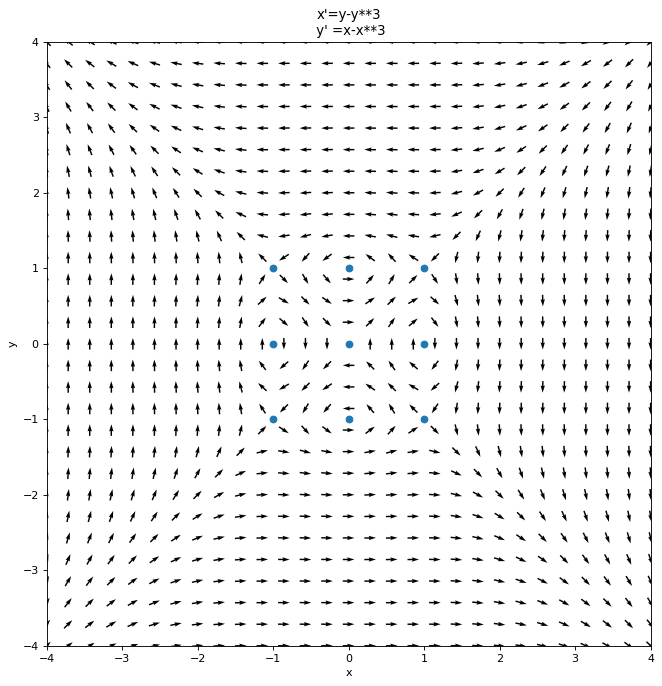

(-1, -1): Saddle Point
                      
⎡0   -2⎤
⎢      ⎥
⎣-2  0 ⎦


 -2.0⋅t ⎡1.0⎤    2.0⋅t ⎡-1.0⎤
e      ⋅⎢   ⎥ + e     ⋅⎢    ⎥
        ⎣1.0⎦          ⎣1.0 ⎦

----------------------------

(-1, 0): Center
               
⎡0   1⎤
⎢     ⎥
⎣-2  0⎦


 -1.414⋅ⅈ⋅t ⎡0.7071⋅ⅈ⎤    1.414⋅ⅈ⋅t ⎡-0.7071⋅ⅈ⎤
e          ⋅⎢        ⎥ + e         ⋅⎢         ⎥
            ⎣  1.0   ⎦              ⎣   1.0   ⎦

----------------------------

(-1, 1): Saddle Point
                     
⎡0   -2⎤
⎢      ⎥
⎣-2  0 ⎦


 -2.0⋅t ⎡1.0⎤    2.0⋅t ⎡-1.0⎤
e      ⋅⎢   ⎥ + e     ⋅⎢    ⎥
        ⎣1.0⎦          ⎣1.0 ⎦

----------------------------

(0, -1): Center
               
⎡0  -2⎤
⎢     ⎥
⎣1  0 ⎦


 -1.414⋅ⅈ⋅t ⎡-1.414⋅ⅈ⎤    1.414⋅ⅈ⋅t ⎡1.414⋅ⅈ⎤
e          ⋅⎢        ⎥ + e         ⋅⎢       ⎥
            ⎣  1.0   ⎦              ⎣  1.0  ⎦

----------------------------

(0, 0): Saddle Point
                    
⎡0  1⎤
⎢    ⎥
⎣1  0⎦


 -1.0⋅t ⎡-1.0⎤    1.0⋅t ⎡1.0⎤
e      ⋅⎢    ⎥ + e     ⋅⎢   ⎥
        ⎣1.0 ⎦          ⎣

In [61]:
f = ["y-y**3", #xdot
     "x-x**3"] #ydot

fixed_points_list = sympy.solve(f,x_s,y_s)
#fixed_points_list = [[0,np.pi]] # Input manually for trig, sympy solver can't handle that

plot_vector_field(f, fixed_points_list)

characterize_fixed_points(fixed_points_list)

In [59]:
#func, x_dot, y_dot = make_sympy_equations(f,True)
def plot_vector_field(f, fixed_points):
    x_range = [-4,4] # set x and y range
    y_range = [-4,4]
    graph_size = 10
    N = 3*graph_size-1 # Number of points on grid
    x_points = np.linspace(start = x_range[0], # make array of N points that spans x range 
                           stop = x_range[1],
                           num = N)
    y_points = np.linspace(start = y_range[0],
                           stop = y_range[1],
                           num = N)
    x,y = np.meshgrid(x_points,y_points) # creates a grid/ kronecker product from x, y arrays

    def dxdt_and_dydt(x,y): # evaluate the string f, which has x and y, so iterate through each point it has,
        return map(eval, f) # this gives the rate of change--> direction of vectors

    x_dot, y_dot = dxdt_and_dydt(x,y) # array of 
    
    Normalizing_Factor = np.hypot(x_dot, y_dot) # Find length of vector
    
    Normalizing_Factor[Normalizing_Factor==0]=1. # Corrects div/0 errors by replacing it with 1
    
    x_dot = 2*x_dot/Normalizing_Factor # normalize vector to length 1
    y_dot = 2*y_dot/Normalizing_Factor
    
    
    fig = plt.figure(figsize=(graph_size, graph_size), dpi=80)
    ax = fig.add_subplot(111,
                         aspect='equal', # makes it square
                         autoscale_on=False,
                         xlim=(x_range[0], x_range[1]),
                         ylim=(y_range[0], y_range[1]))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("x'={}\n y' ={}".format(f[0],f[1]))
    plt.quiver(x,y,x_dot,y_dot, pivot="mid")
    x_val = [x[0] for x in fixed_points]
    y_val = [x[1] for x in fixed_points]
    plt.scatter(x_val, y_val)
    return plt.show()

def make_sympy_equations(f, # function string
                         functions=False, # Any special functions present? (sin, cos, exp,...)
                         parameters=[]): # Other parameters like mu, a, b, r,...
    func = f.copy()
    for i in [0,1]:
        func[i] = func[i].replace("x","x_s") 
        func[i] = func[i].replace("y","y_s")
        func[i] = func[i].replace("np.e**","exp")
    if functions == True:
        for i in [0,1]:
            
            func[i] = func[i].replace("np.sin","sin")
    if len(parameters) >=1 :
        for parameter in parameters: # for including thnings like b, mu, r
            for i in [0,1]:
                func[i] = func[i].replace(f"{parameter}","\{}".format(parameter))
    x_dot = sympy.parse_expr(func[0],
                          local_dict={"x_s": x_s, "y_s": y_s}) # Parse string, substitute "x_s" string for x_s
    y_dot = sympy.parse_expr(func[1],
                          local_dict={"x_s": x_s, "y_s": y_s})
    return func, x_dot, y_dot

def linearize(xdot, ydot, fixed_point): # Create the Jacobian Matrix for a given system
    a=sympy.diff(xdot,x_s).subs(x_s, fixed_point[0]).subs(y_s, fixed_point[1])
    b=sympy.diff(xdot,y_s).subs(x_s, fixed_point[0]).subs(y_s, fixed_point[1])
    c=sympy.diff(ydot,x_s).subs(x_s, fixed_point[0]).subs(y_s, fixed_point[1])
    d=sympy.diff(ydot,y_s).subs(x_s, fixed_point[0]).subs(y_s, fixed_point[1])
    A=sympy.Matrix([[a,b],[c,d]])
    return A

def find_delta_tau(A): # Returns delta, tau, the determinant and solution of the linear(ized) system 
    e, t = sympy.symbols(' e t ')
    A_vecs = A.eigenvects()
    
    L_1, m_1, vm1 = A_vecs[0] # Eigenvalue, Multiplicity, Eigenvector
    L_2, m_2, vm2 = A_vecs[1]
    
    v_1 = sympy.UnevaluatedExpr( # Don't Evaluate
          sympy.N( # N(float, precision)
              vm1[0], # Eigenvector
              4))
    v_2 = sympy.UnevaluatedExpr(sympy.N(vm2[0], 4))
    
    Delta = L_1*L_2
    Tau = L_1+L_2
    det = Tau**2-4*Delta
    
    
    exp_1 = sympy.Pow(e,sympy.N(L_1,4)*t) # N(float, precision)
    exp_2 = sympy.Pow(e,sympy.N(L_2,4)*t)
    
    y1 = sympy.UnevaluatedExpr(sympy.Mul(v_1,exp_1))
    y2 = sympy.UnevaluatedExpr(sympy.Mul(v_2,exp_2))
    return Delta, Tau, det, y1, y2
    
def find_matrix_stability(Delta, Tau, det):
    str = ""
    if Tau<0:
        str+="Stable "
    elif Tau>0:
        str+="Unstable "
    if Delta<0:
        result = "Saddle Point" 
    elif Tau==0:
        result =  "Center"
    elif Delta==0:
        result =  "Non-Isolated Fixed Points"
    elif Delta>0:
        if det==0:
            result =  str+"Star / Degenerate Nodes"
        elif det>0:
            result =  str+"Node"
        elif det<0:
            result =  str+"Spiral"
    return result

def characterize_fixed_points(fixed_points_list):
    for point in fixed_points_list:
        A = linearize(x_dot,y_dot, point)
        Delta, Tau, det, y1, y2 = find_delta_tau(A)
        Result = find_matrix_stability(Delta, Tau, det)

        sympy.pprint("{}: {}\n\n".format(point, Result))#, use_unicode=True)
        sympy.pprint(A)
        print("\n")
        sympy.pprint(y1+y2, use_unicode=True)
        print("\n----------------------------\n")

In [4]:
print(sympy.sin(x_s))

sin(x)
